In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('laptop_data.csv')


In [170]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [171]:
df.isnull().sum() # to check any null values in any column

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [172]:
df.duplicated().sum() # to check any duplicate rows so that we can remove

0

In [173]:
df.drop(columns=['Unnamed: 0'],inplace=True) #drop unwanted columns

In [174]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [175]:
df['Ram']=df['Ram'].str.replace('GB','')


In [176]:
df['Weight']=df['Weight'].str.replace('kg','')

In [177]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float64')

C:\Users\Dell\AppData\Local\Temp\ipykernel_4576\1235299960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

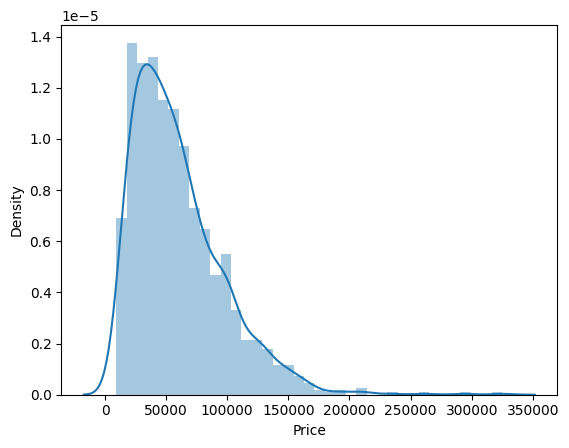

In [178]:
import seaborn as sns
sns.distplot(df['Price']) 

<AxesSubplot: >

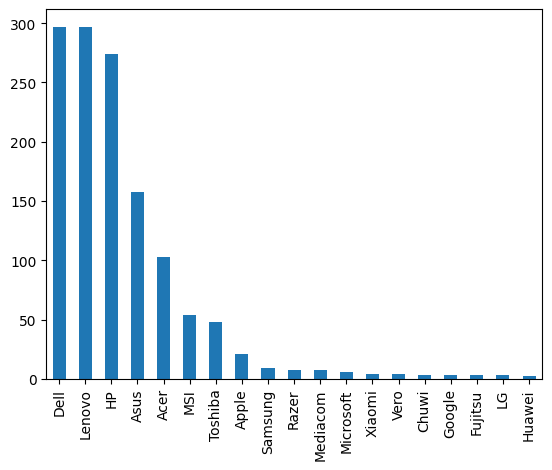

In [179]:
df['Company'].value_counts().plot(kind='bar')

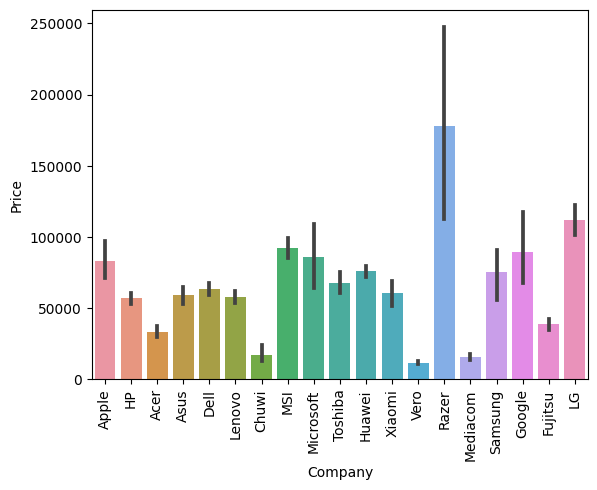

In [180]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

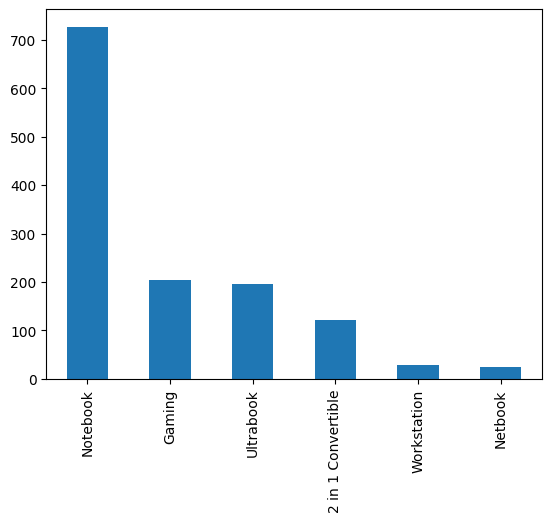

In [181]:
df['TypeName'].value_counts().plot(kind='bar')

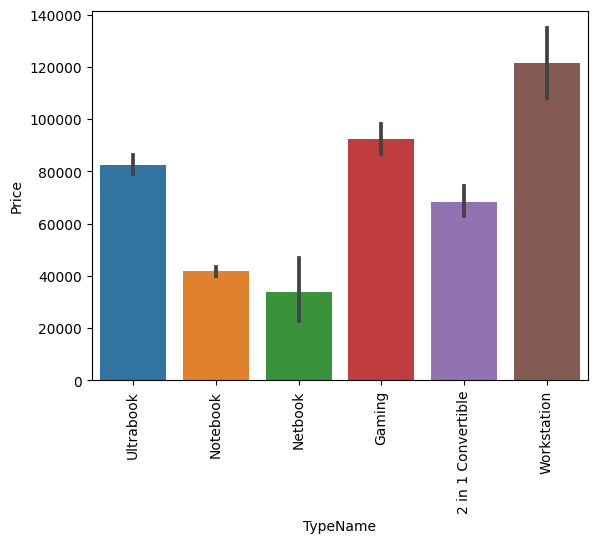

In [182]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='Inches', ylabel='Price'>

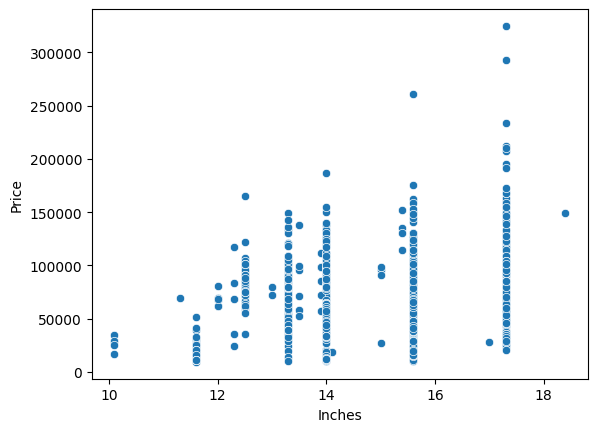

In [183]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [184]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [185]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot: >

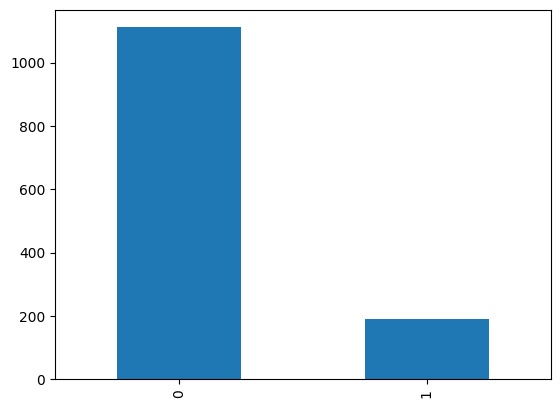

In [186]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Touchscreen', ylabel='Price'>

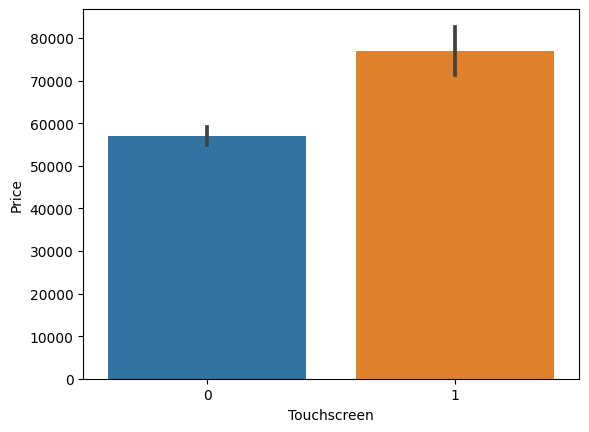

In [187]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

<AxesSubplot: >

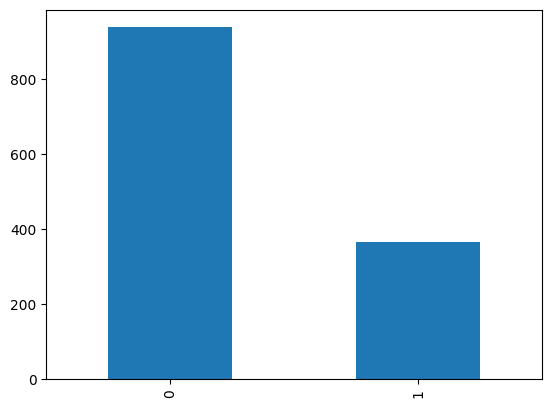

In [188]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['IPS'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='IPS', ylabel='Price'>

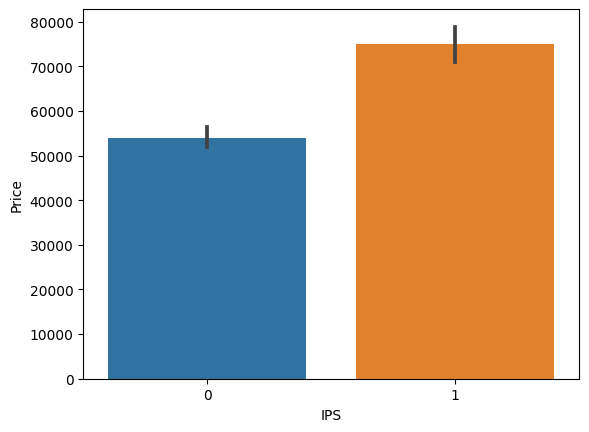

In [189]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [190]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [191]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [192]:
df.sample()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
1031,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,6,1TB HDD,AMD Radeon R5,Windows 10,2.1,21791.52,0,0,1366,768


In [193]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d)').apply(lambda x:x[0])

In [194]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [196]:
df.corr()['Price']

C:\Users\Dell\AppData\Local\Temp\ipykernel_4576\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [197]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [198]:
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace=True)

In [199]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [200]:
df['CPU Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [201]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [202]:
def fetch_processor(text):
  if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3' :
    return text
  else:
    if text.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'


In [203]:
df['CPU Name']=df['CPU Name'].apply(fetch_processor)

In [204]:
df['CPU Name'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU Name, dtype: int64

In [205]:
df.drop(columns=['Cpu'],inplace=True)

In [206]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot: >

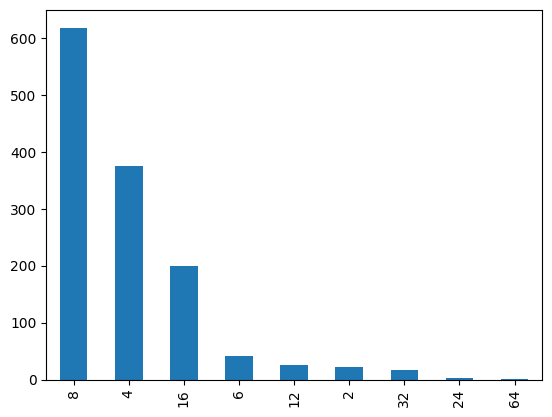

In [207]:
df['Ram'].value_counts().plot(kind='bar')

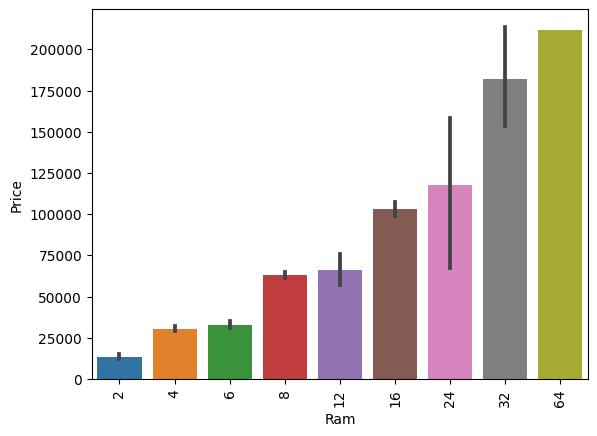

In [208]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [209]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [210]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4576\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Dell\AppData\Local\Temp\ipykernel_4576\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [211]:
df.drop(columns=['Memory'],inplace=True)

In [212]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [213]:
df.corr()['Price']

C:\Users\Dell\AppData\Local\Temp\ipykernel_4576\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [214]:
df.drop(columns=['Flash_Storage','Hybrid'],inplace=True)

In [215]:
df['GPU brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [216]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [217]:
df.drop(columns=['Gpu'],inplace=True)

In [218]:
df=df[df['GPU brand'] != 'ARM']

In [219]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

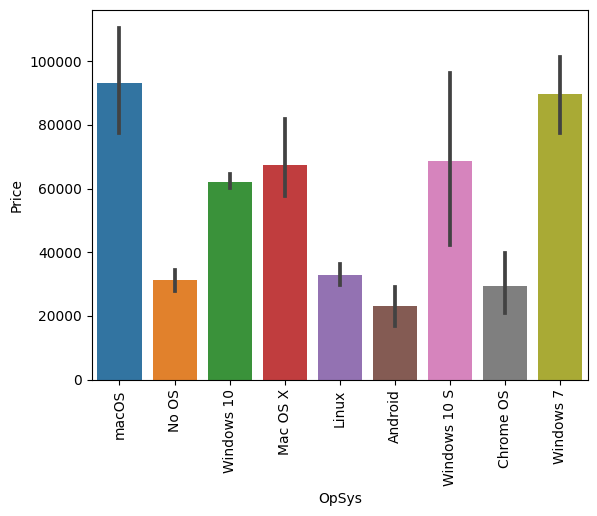

In [220]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [221]:
def cat_os(inp):
  if inp=='Windows 10' or inp=='Windows 10 S' or inp=='Windows 7':
    return 'Windows'
  elif inp=='macOS' or inp=='Mac OS X':
    return 'macOS'
  else:
   return 'Others/No OS/Linux'  


In [222]:
df['OpSys']=df['OpSys'].apply(cat_os)

In [223]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


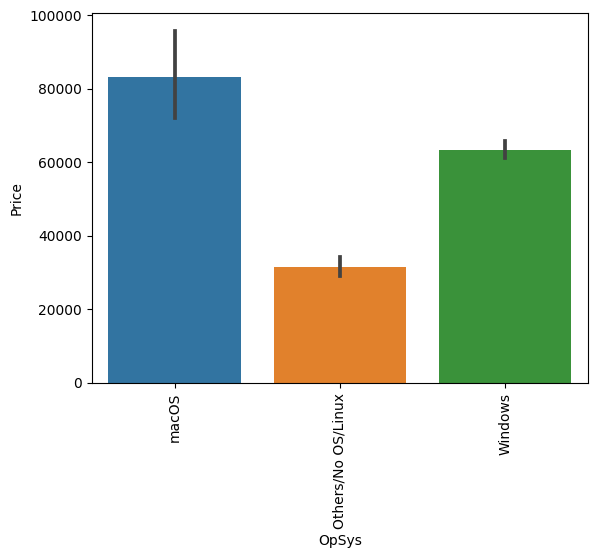

In [224]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

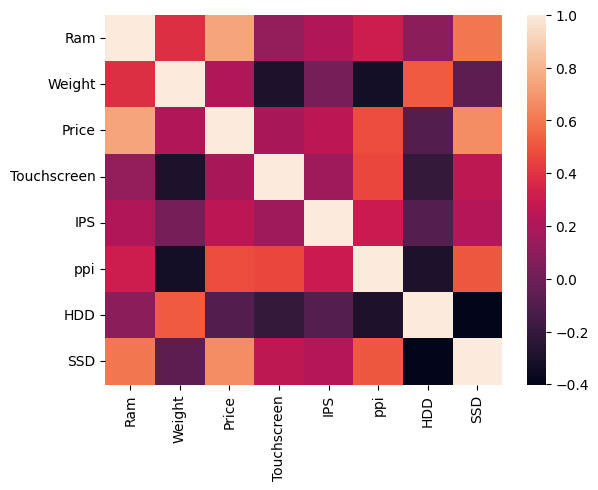

In [225]:
sns.heatmap(df.corr(numeric_only = True))

In [226]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [227]:
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [228]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [229]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
     ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8073277450155152
MAE 0.21017827953018756


In [230]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=Ridge(alpha=10)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8126380430844962
MAE 0.20960380702522158


In [231]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=Lasso(alpha=0.001)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 Score 0.807066324275146
MAE 0.2113741308700196


In [232]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=KNeighborsRegressor(n_neighbors=3)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.7962639250294528
MAE 0.19937575177163036


In [233]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,3,8,11])],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8323360662370566
MAE 0.18590534547654727


In [248]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8847488807270669
MAE 0.1624475327145508


In [235]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8070442584308677
MAE 0.2025497100314981


In [236]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=15)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8780438263477833
MAE 0.15977344336095844


In [237]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.7964850840492724
MAE 0.2290967657937678


In [238]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=GradientBoostingRegressor(n_estimators=500)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8824644811926994
MAE 0.15828008183867234


In [239]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5)

pipe=Pipeline(
    [('step1',step1),
     ('step2',step2)]
)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8780478787306367
MAE 0.1636936397330588


In [240]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8891848282987994
MAE 0.15927526456999785


In [241]:
x

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CPU Name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD


In [242]:
df.sample()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,CPU Name,HDD,SSD,GPU brand
382,Asus,Gaming,8,Windows,2.3,88178.4,0,1,141.211998,Intel Core i7,1000,128,Nvidia


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   CPU Name     1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  GPU brand    1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


In [244]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8813387565067242
MAE 0.16674001750934547


In [250]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [246]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   CPU Name     1302 non-null   object 
 10  HDD          1302 non-null   int64  
 11  SSD          1302 non-null   int64  
 12  GPU brand    1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


In [251]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   CPU Name     1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  GPU brand    1302 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 127.1+ KB


In [247]:
x

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,ppi,CPU Name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD
